# Dekompozycja spektralna

In [1]:
import numpy as np
import scipy.linalg
import time
import matplotlib.pyplot as plt

In [2]:
def get_symetric_matrix(n):
    M = np.random.uniform(size=(n, n))
    return 0.5*(M+M.T)

In [3]:
def get_dominant_eigenvalue(M):
    eig_vals, eig_vecs = scipy.linalg.eigh(M)
    if abs(eig_vals[0]) > abs(eig_vals[-1]):
        return abs(eig_vals[0]), eig_vecs[:,0]/np.linalg.norm(eig_vecs[:,0])
    else:
        return abs(eig_vals[-1]), eig_vecs[:,-1]/np.linalg.norm(eig_vecs[:,-1])

## Metoda potęgowa

In [46]:
def power_method(M, max_iter=10000):
    eps = 10**(-10)
    n = M.shape[0]
    x1 = np.random.uniform(size=(n, 1))
    for i in range(max_iter):
        x2 = M@x1
        x2_norm = x2/np.linalg.norm(x2, ord=np.inf)
        if np.linalg.norm(x2_norm-x1) < eps:
            x1 = x2_norm
            break
        x1 = x2_norm
        
    return np.linalg.norm(x2, np.inf), (x1/np.linalg.norm(x1)).reshape(n), i

In [49]:
def check_get_times(eps=10**(-6)):
    sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    times = []
    iterations = []
    for s in sizes:
        M = get_symetric_matrix(s)
        start = time.time()
        eig_val, eig_vec, it = power_method(M)
        end = time.time()
        times.append(end-start)
        iterations.append(it)
        l_eig_val, l_eig_vec = get_dominant_eigenvalue(M)
        if l_eig_vec[0]*eig_vec[0]<0:
            l_eig_vec *= -1.
        
        print(f'{s}x{s} matrix, {round(eig_val, 3)}, {round(l_eig_val, 3)}, eigenvalues equal: {abs(l_eig_val-eig_val)<eps}, eigenvectors equal: {np.allclose(eig_vec, l_eig_vec, rtol=eps)}')
    return sizes, times, iterations

def show_times(eps=10**(-6)):
    sizes, times, iterations = check_get_times(eps)
    fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
    fig.suptitle("Time [s]")
    ax1.plot(sizes, times)   
    plt.show()
    return iterations

100x100 matrix, 49.87, 49.87, eigenvalues equal: True, eigenvectors equal: True
200x200 matrix, 100.21, 100.21, eigenvalues equal: True, eigenvectors equal: True
300x300 matrix, 150.29, 150.29, eigenvalues equal: True, eigenvectors equal: True
400x400 matrix, 200.46, 200.46, eigenvalues equal: True, eigenvectors equal: True
500x500 matrix, 250.454, 250.454, eigenvalues equal: True, eigenvectors equal: True
600x600 matrix, 300.163, 300.163, eigenvalues equal: True, eigenvectors equal: True
700x700 matrix, 350.358, 350.358, eigenvalues equal: True, eigenvectors equal: True
800x800 matrix, 400.553, 400.553, eigenvalues equal: True, eigenvectors equal: True
900x900 matrix, 450.118, 450.118, eigenvalues equal: True, eigenvectors equal: True
1000x1000 matrix, 500.364, 500.364, eigenvalues equal: True, eigenvectors equal: True


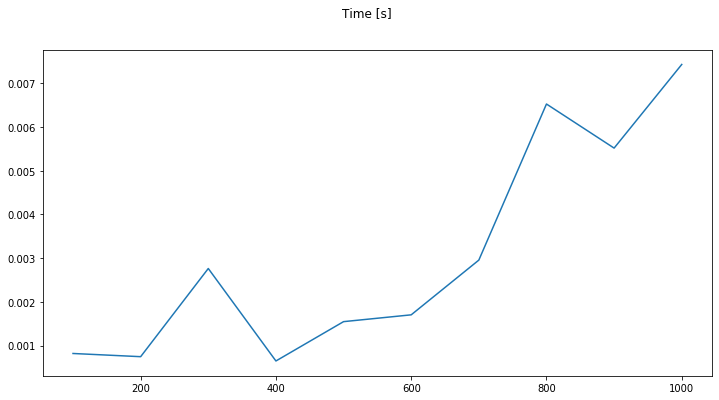

In [51]:
iterations_power_method = show_times()

## Odwrotna metoda potęgowa

In [27]:
def inverse_power_method(M, sigma, max_iter=10000):
    eps = 10**(-10)
    n = M.shape[0]
    x1 = np.random.uniform(size=(n, 1))
    B = M - sigma*np.identity(n)
    for i in range(max_iter):
        P,L,U = scipy.linalg.lu(B)
        y = scipy.linalg.solve_triangular(L, P@x1)
        x2 = scipy.linalg.solve_triangular(U, y)
        x2_norm = x2/np.linalg.norm(x2, ord=np.inf)
        if np.linalg.norm(x2_norm-x1) < eps:
            x1 = x2_norm
            break
        x1 = x2_norm
        
    return (x1/np.linalg.norm(x1)).reshape(n)

In [42]:
def check_power_method(eps=10**(-4)):
    sizes = [100, 200, 500]
    for s in sizes:
        M = get_symetric_matrix(s)
        l_eig_val, l_eig_vec = get_dominant_eigenvalue(M)
        eig_vec = inverse_power_method(M, l_eig_val+eps)

        if l_eig_vec[0]*eig_vec[0]<0:
            l_eig_vec *= -1.
        print(f'{s}x{s} matrix, eigenvalues equal: eigenvectors equal: {np.allclose(eig_vec, l_eig_vec, rtol=10**(-2))}')

In [43]:
check_power_method()

100x100 matrix, eigenvalues equal: eigenvectors equal: True
200x200 matrix, eigenvalues equal: eigenvectors equal: True
500x500 matrix, eigenvalues equal: eigenvectors equal: True


## Iteracje z ilorazem Rayleigha

In [57]:
def rayleigh_iteration_method(M, mu, max_iter=10000):
    eps = 10**(-6)
    n = M.shape[0]
    x1 = np.random.uniform(size=(n, 1))
    #x1 = np.ones((n, 1))
    for i in range(max_iter):
        B = M - mu*np.identity(n)
        P,L,U = scipy.linalg.lu(B)
        y = scipy.linalg.solve_triangular(L, P@x1)
        x2 = scipy.linalg.solve_triangular(U, y)
        x2_norm = x2/np.linalg.norm(x2, ord=np.inf)
        if np.linalg.norm(x2_norm-x1) < eps:
            x1 = x2_norm
            mu = (x1.T@M@x1/(x1.T@x1)).item()
            break
        x1 = x2_norm
        mu = (x1.T@M@x1/(x1.T@x1)).item()

    return mu, (x1/np.linalg.norm(x1)).reshape(n), i

In [62]:
def check_get_times(eps=10**(-6)):
    sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    times = []
    iterations = []
    for s in sizes:
        M = get_symetric_matrix(s)
        l_eig_val, l_eig_vec = get_dominant_eigenvalue(M)
        start = time.time()
        eig_val, eig_vec, it = rayleigh_iteration_method(M, l_eig_val+eps)
        end = time.time()
        times.append(end-start)
        iterations.append(it)
        if l_eig_vec[0]*eig_vec[0]<0:
            l_eig_vec *= -1.
        
        print(f'{s}x{s} matrix, {round(eig_val, 3)}, {round(l_eig_val, 3)}, eigenvalues equal: {abs(l_eig_val-eig_val)<eps}, eigenvectors equal: {np.allclose(eig_vec, l_eig_vec, rtol=eps)}')
    return sizes, times, iterations

def show_times(eps=10**(-6)):
    sizes, times, iterations = check_get_times(eps)
    fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
    fig.suptitle("Time [s]")
    ax1.plot(sizes, times)   
    plt.show()
    return iterations

100x100 matrix, 50.004, 50.004, eigenvalues equal: True, eigenvectors equal: True
200x200 matrix, 99.796, 99.796, eigenvalues equal: True, eigenvectors equal: True
300x300 matrix, 150.001, 150.001, eigenvalues equal: True, eigenvectors equal: True
400x400 matrix, 199.768, 199.768, eigenvalues equal: True, eigenvectors equal: True
500x500 matrix, 250.152, 250.152, eigenvalues equal: True, eigenvectors equal: True
600x600 matrix, 300.428, 300.428, eigenvalues equal: True, eigenvectors equal: True
700x700 matrix, 350.065, 350.065, eigenvalues equal: True, eigenvectors equal: True
800x800 matrix, 399.894, 399.894, eigenvalues equal: True, eigenvectors equal: True
900x900 matrix, 450.393, 450.393, eigenvalues equal: True, eigenvectors equal: True
1000x1000 matrix, 500.019, 500.019, eigenvalues equal: True, eigenvectors equal: True


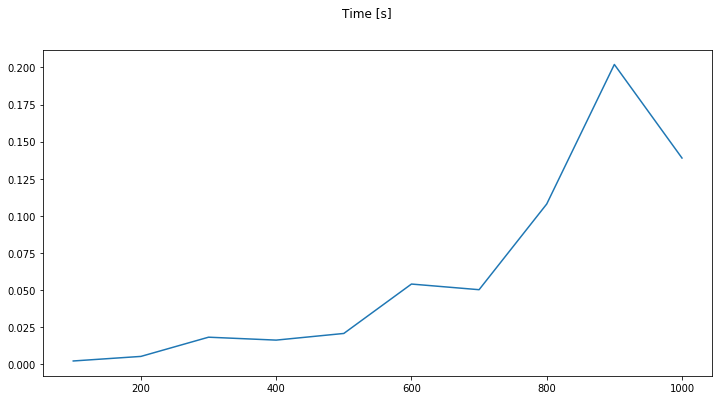

In [63]:
iterations_rayleigh = show_times()

In [64]:
sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for i in range(len(sizes)):
    print(f'{sizes[i]}x{sizes[i]} matrix, power method: {iterations_power_method[i]} iterations, rayleigh method: {iterations_rayleigh[i]} iterations')

100x100 matrix, power method: 9 iterations, rayleigh method: 2 iterations
200x200 matrix, power method: 9 iterations, rayleigh method: 2 iterations
300x300 matrix, power method: 8 iterations, rayleigh method: 2 iterations
400x400 matrix, power method: 8 iterations, rayleigh method: 2 iterations
500x500 matrix, power method: 8 iterations, rayleigh method: 2 iterations
600x600 matrix, power method: 8 iterations, rayleigh method: 2 iterations
700x700 matrix, power method: 7 iterations, rayleigh method: 2 iterations
800x800 matrix, power method: 7 iterations, rayleigh method: 3 iterations
900x900 matrix, power method: 7 iterations, rayleigh method: 5 iterations
1000x1000 matrix, power method: 7 iterations, rayleigh method: 2 iterations
